*** Author: Chirag & Prerak ***
***###Mercedes-Benz Greener Manufacturer###***
*** Predicting Time Taken in seconds for each car benchmark ***

**Importing the essential libraries**

In [291]:
import pandas as pd
import numpy as np
from time import time
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
#import tensorflow.compat.v1 as tf 
import scipy
import xgboost as xgb
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [292]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [293]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [294]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [295]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [296]:
train_df['y'].value_counts()

90.76     7
89.06     7
89.38     7
91.88     7
93.62     6
         ..
93.26     1
93.24     1
105.94    1
94.17     1
79.00     1
Name: y, Length: 2545, dtype: int64

In [297]:
def data_summary(df):
    print(df.shape)
    print(df.info())   
    print(df.head(5))

""" calling functions to print summary statistics of training data """
data_summary(train_df)
data_summary(test_df)

(4209, 378)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
(4209, 377)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to 

**Removing the variables which have only one value as zero**

In [298]:
train_df.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'],axis=1,inplace=True)
test_df.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347'],axis=1,inplace=True)

**Checking for any missing values**

In [299]:
def check_missing_values(df):
    if df.isnull().any().any():
        print("There are missing values in the dataframe")
    else:
        print("There are no missing values in the dataframe")
        
""" calling functions to check missing values on training and test datasets """
check_missing_values(train_df)
check_missing_values(test_df)

There are no missing values in the dataframe
There are no missing values in the dataframe


**Outlier Detection and plotting the graphs**

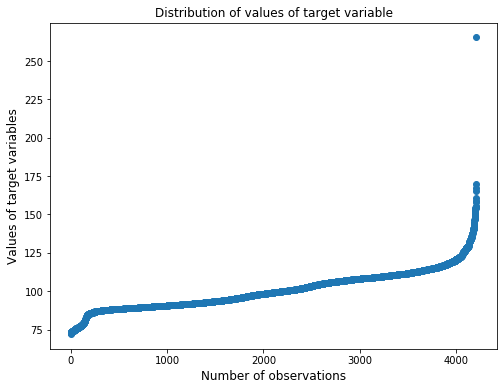

In [300]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('Number of observations', fontsize=12)
plt.ylabel('Values of target variables', fontsize=12)
plt.title('Distribution of values of target variable')
plt.show()



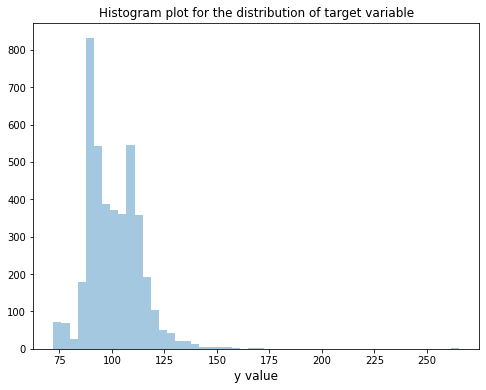

In [302]:
#Histogram for training data
plt.figure(figsize=(8,6))
sns.distplot(train_df.y.values, bins=50, kde=False)
plt.xlabel('y value', fontsize=12)
plt.title('Histogram plot for the distribution of target variable')
plt.show()

In [239]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = train_df.select_dtypes(include=numerics)       #  numeric dataframe
objects = ['O']
df_cat = train_df.select_dtypes(include=objects)
print(df_num.shape,df_cat.shape)
print(df_cat.columns,'\n','--------------------------------------------------------------------------------','\n',df_num.columns)


(4209, 357) (4209, 8)
Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object') 
 -------------------------------------------------------------------------------- 
 Index(['ID', 'y', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=357)


**Removing the outliers**

In [240]:
#setting the threshold as 150 to remove the outliers
temp=train_df.y.values
df_cat['y']=temp
print(df_cat.head())

print((train_df.loc[train_df.y>150,'y'].values))
train_df=train_df[train_df.y<150]
print("Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . ")
print(train_df.shape)


   X0 X1  X2 X3 X4 X5 X6 X8       y
0   k  v  at  a  d  u  j  o  130.81
1   k  t  av  e  d  y  l  o   88.53
2  az  w   n  c  d  x  j  x   76.26
3  az  t   n  f  d  x  l  e   80.62
4  az  v   n  f  d  h  d  n   78.02
[150.43 169.91 154.87 265.32 158.53 154.43 160.87 150.89 152.32 167.45
 154.16 158.23 153.51 165.52 155.62]
Removing outliers based on above information and setting 150 as a threshold value . . . . . . . . . . . . . . . . . . . . 
(4194, 365)


Text(0.5, 1.0, 'Log transformation Probabiliy plot')

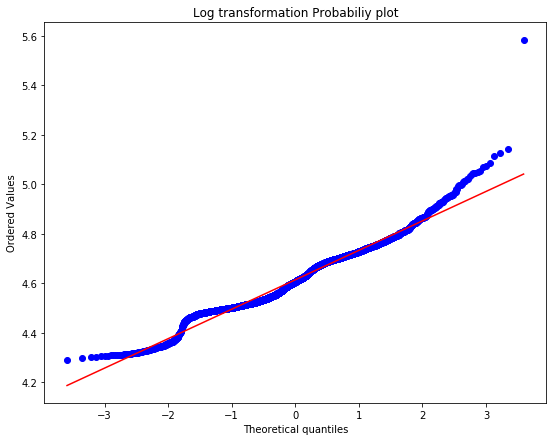

In [303]:
#Taking Log Transformation
plt.figure(figsize=(9,7))
res = stats.probplot(np.log1p(train_df["y"]), plot=plt)
plt.title('Log transformation Probabiliy plot')


**Plotting the categorical variables**

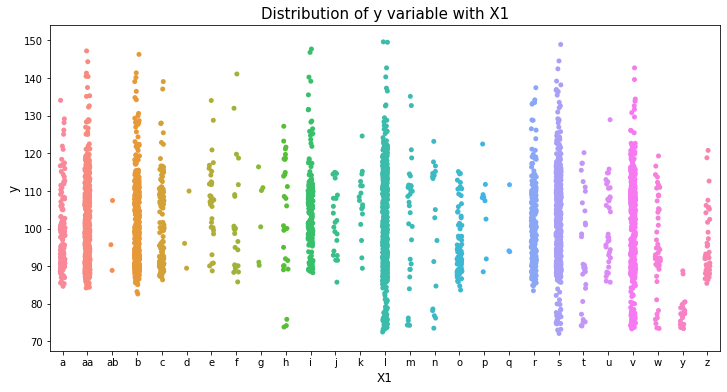

In [242]:
#Categorical variable: "X1"
var_name = "X1"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

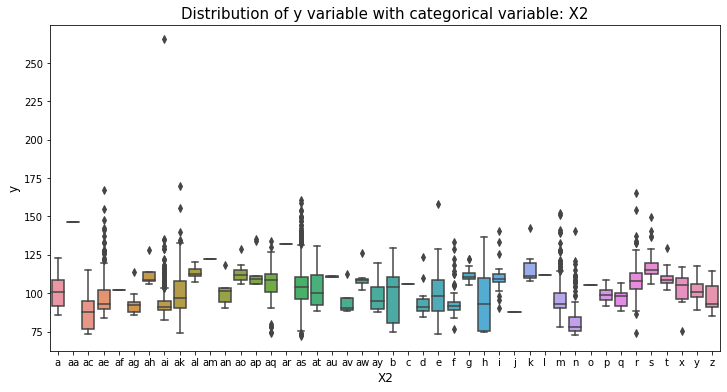

In [304]:
#Categorical variable: "X2"
var_name = "X2"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.boxplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with categorical variable: "+var_name, fontsize=15)
plt.show()

**Plotting the binary variables**

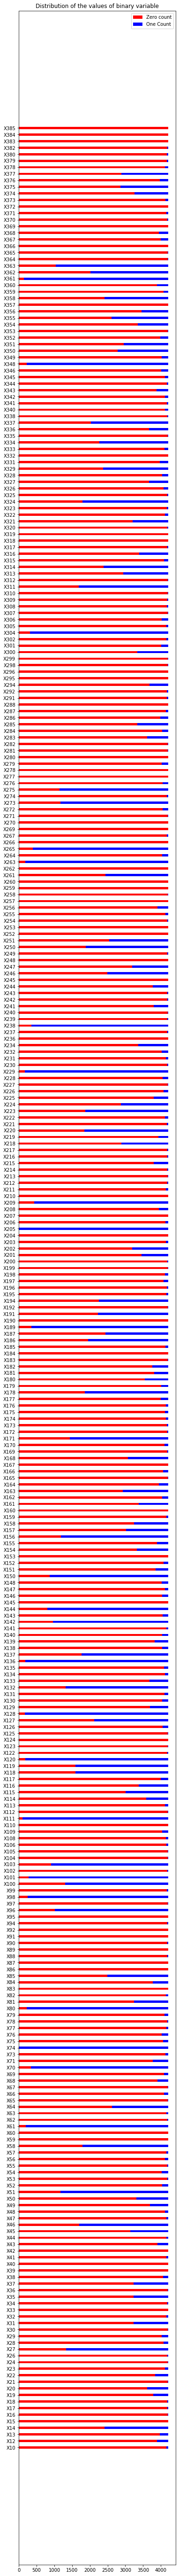

In [305]:
#Binar variable distribution of zeros and ones values
zero_count_list = []
one_count_list = []
cols_list = unique_values_dict['[0, 1]']
for col in cols_list:
    zero_count_list.append((train_df[col]==0).sum())
    one_count_list.append((train_df[col]==1).sum())

N = len(cols_list)
ind = np.arange(N)
width = 0.35
plt.figure(figsize=(6,100))
p1 = plt.barh(ind, zero_count_list, width, color='red')
p2 = plt.barh(ind, one_count_list, width, left=zero_count_list, color="blue")
plt.yticks(ind, cols_list)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.title('Distribution of the values of binary variable')
plt.show()

In [245]:
def initial_datatype_conversion(df):
    cols = ['X0','X1','X2','X3','X4','X5','X6','X8']
    for col in cols:
        df[col] = df[col].astype('category')
    return df

""" datatype conversion """
ret_train_df = initial_datatype_conversion(train_df)
ret_test_df = initial_datatype_conversion(test_df)

""" combining categorical attributes from training and test datasets """
train_df_cat = ret_train_df.loc[:,['X0','X1','X2','X3','X4','X5','X6','X8']]
test_df_cat = ret_test_df.loc[:,['X0','X1','X2','X3','X4','X5','X6','X8']]
train_df_cat = train_df_cat.add_prefix('train_')
test_df_cat = test_df_cat.add_prefix('test_')
combined = train_df_cat.append(test_df_cat, ignore_index=True)

**Lael Encoding for categorical variables by using get_dummies**

In [246]:
le = LabelEncoder()
cols = ['X0', 'X1', 'X2','X3','X4','X5','X6','X8']

ret_train_df = pd.get_dummies(ret_train_df, columns=['X0', 'X1', 'X2','X3','X4','X5','X6','X8'], prefix=['X0', 'X1', 'X2','X3','X4','X5','X6','X8'])
ret_test_df = pd.get_dummies(ret_test_df, columns=['X0', 'X1', 'X2','X3','X4','X5','X6','X8'], prefix=['X0', 'X1', 'X2','X3','X4','X5','X6','X8'])

In [306]:
ret_train_df.head()

,ID,y,X10,X12,X13,X14,X15,X16,X17,X18,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,130.81,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,6,88.53,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,7,76.26,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,9,80.62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [247]:
cols = ret_test_df.filter(like='_bb').columns
train_X = ret_train_df.drop(['ID','y'], axis=1)
train_Y = ret_train_df['y']
train_Y = train_Y.values
test_X = ret_test_df.drop(['ID'],axis=1)
test_X = test_X.drop(cols, axis=1)

matching_cols = train_X.columns.intersection(test_X.columns)
matching_cols_list = matching_cols.tolist()

test_X = test_X[matching_cols_list]
train_X = train_X[matching_cols_list]



**Splitting the dataset**

In [248]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=48)

In [249]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2809, 540)
(1385, 540)
(2809,)
(1385,)


**Standardisation of training and test data**

In [250]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Model Evaluation**

In [251]:
#Support Vector Machine
svr_clf = SVR(kernel="poly",degree=6,coef0=1,C=10)
svr_clf.fit(X_train, y_train)
pred_Y = svr_clf.predict(X_test)
r2_score_svc = round(r2_score(y_test, pred_Y),3)
accuracy = round(svr_clf.score(X_train, y_train) * 100, 2)
print(accuracy)
returnval = {'model':'SVR', 'r2_score':r2_score_svc}
print(returnval)

94.13
{'model': 'SVR', 'r2_score': 0.499}


In [252]:
#Random Forest Regressor
rfr_clf = RandomForestRegressor(n_estimators = 50,max_depth=30)
rfr_clf.fit(X_train, y_train)
pred_Y = rfr_clf.predict(X_test)
r2_score_rfc = round(r2_score(y_test, pred_Y),3)
accuracy = round(rfr_clf.score(X_train, y_train) * 100, 2)
print(accuracy)
returnval = {'model':'RandomForestRegressor','r2_score':r2_score_rfc}
print(returnval)

91.42
{'model': 'RandomForestRegressor', 'r2_score': 0.585}


In [253]:
#K-Nearest Neighbors Regressor
knn = KNeighborsRegressor(n_neighbors=3, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
pred_Y = knn.predict(X_test)
r2_score_knn = round(r2_score(y_test, pred_Y),3)
accuracy = round(knn.score(X_train, y_train) *100,2)
print(accuracy)
returnval = {'model':'KNeighborsRegressor','r2_score':r2_score_knn}
print(returnval)

70.45
{'model': 'KNeighborsRegressor', 'r2_score': 0.456}


In [254]:
#Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)
pred_Y = regr.predict(X_test)
r2_score_lr = round(r2_score(y_test, pred_Y),3)
accuracy = round(regr.score(X_train, y_train) *100,2)
print(accuracy)
returnval = {'model':'LinearRegressor', 'r2_score':r2_score_lr}
print(returnval)

67.16
{'model': 'LinearRegressor', 'r2_score': -7.751652682168481e+25}


In [255]:
#Decision Trees
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=30)
regressor.fit(X_train, y_train)
pred_Y = regressor.predict(X_test)
r2_score_knn = round(r2_score(y_test, pred_Y),3)
accuracy = round(regressor.score(X_train, y_train) *100,2)
print(accuracy)
returnval = {'model':'Decision Trees','r2_score':r2_score_knn}
print(returnval)

96.73
{'model': 'Decision Trees', 'r2_score': 0.311}


In [260]:
#XGBOOST
xg_reg = xgb.XGBRegressor(objective='reg:tweedie',booster='gbtree',seed=123,n_estimators=100,eta=0.03)
xg_reg.fit(X_train,y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

r2_score_xgboost = round(r2_score(y_test, preds),3)

returnval = {'model':'XGBOOST', 'r2_score':r2_score_xgboost}
print(returnval)

{'model': 'XGBOOST', 'r2_score': 0.646}


**Applying PCA technique**

In [256]:
#PCA technique with SVM
pca_model_accuracies = pd.DataFrame()
pca = PCA(n_components = 10,svd_solver='randomized',whiten=True)
pca.fit(X_train)
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

svr_clf = SVR(kernel="poly",degree=3,coef0=1,C=10)
svr_clf.fit(train_X_pca, y_train)
pred_Y = svr_clf.predict(test_X_pca)
r2_score_svc = round(r2_score(y_test, pred_Y),3)
accuracy = round(svr_clf.score(train_X_pca, y_train) * 100, 2)
print(accuracy)
returnval = {'model':'SVR', 'r2_score':r2_score_svc}
print(returnval)



46.85
{'model': 'SVR', 'r2_score': 0.469}


In [257]:
#PCA technique with Random Forest
pca_model_accuracies = pd.DataFrame()
pca = PCA(n_components = 100,svd_solver='randomized',whiten=True)
pca.fit(X_train)
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

rfr_clf = RandomForestRegressor(n_estimators = 500,max_depth=30)
rfr_clf.fit(train_X_pca, y_train)
pred_Y = rfr_clf.predict(test_X_pca)
r2_score_rfc = round(r2_score(y_test, pred_Y),3)
accuracy = round(rfr_clf.score(train_X_pca, y_train) * 100, 2)
print(accuracy)
returnval = {'model':'RandomForestRegressor','r2_score':r2_score_rfc}
print(returnval)


92.05
{'model': 'RandomForestRegressor', 'r2_score': 0.564}


In [258]:
#PCA technique with K-Nearest Neighbors Regressor
pca_model_accuracies = pd.DataFrame()
pca = PCA(n_components = 10,svd_solver='randomized',whiten=True)
pca.fit(X_train)
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=2,metric = 'manhattan', p = 2)
knn.fit(train_X_pca, y_train)
pred_Y = knn.predict(test_X_pca)
r2_score_knn = round(r2_score(y_test, pred_Y),3)
accuracy = round(knn.score(train_X_pca, y_train) *100,2)
print(accuracy)
returnval = {'model':'KNeighborsRegressor','r2_score':r2_score_knn}
print(returnval)

77.86
{'model': 'KNeighborsRegressor', 'r2_score': 0.366}


In [259]:
#PCA technique with Decision Tree Regressor
pca_model_accuracies = pd.DataFrame()
pca = PCA(n_components = 10,svd_solver='randomized',whiten=True)
pca.fit(X_train)
train_X_pca = pca.transform(X_train)
test_X_pca = pca.transform(X_test)

regressor = DecisionTreeRegressor(max_depth=100)
regressor.fit(train_X_pca, y_train)
pred_Y = regressor.predict(test_X_pca)
r2_score_knn = round(r2_score(y_test, pred_Y),3)
accuracy = round(regressor.score(train_X_pca, y_train) *100,2)
print(accuracy)
returnval = {'model':'Decision Trees','r2_score':r2_score_knn}
print(returnval)

98.2
{'model': 'Decision Trees', 'r2_score': 0.084}


**Applying Recursive Feature Elimination (RFE)**

In [262]:
# Compute the rmse: rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 7.119475


In [16]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


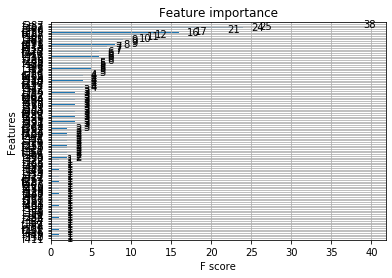

In [139]:
#Plotting importatnt features for XGBOOSTs
xgb.plot_importance(xg_reg)

In [263]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import RFE

rfe = RFE(estimator=GradientBoostingRegressor(learning_rate=0.11, n_estimators=100), n_features_to_select=70, step=150, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)
pred_Y = rfe.predict(X_test)
r2_score_rfc = round(r2_score(y_test, pred_Y),3)
returnval = {'model':'GradientBoostingRegressor','r2_score':r2_score_rfc}
print(returnval)

Fitting estimator with 540 features.
Fitting estimator with 390 features.
Fitting estimator with 240 features.
Fitting estimator with 90 features.
{'model': 'GradientBoostingRegressor', 'r2_score': 0.621}


In [264]:
from sklearn.feature_selection import RFE
# Set the feature eliminator to remove 2 features on each step
rfe = RFE(estimator=RandomForestRegressor(n_estimators = 100), n_features_to_select=10, step=150, verbose=1)

# Fit the model to the training data
rfe.fit(X_train, y_train)
pred_Y = rfe.predict(X_test)
r2_score_rfc = round(r2_score(y_test, pred_Y),3)
returnval = {'model':'RandomForestRegressor','r2_score':r2_score_rfc}
print(returnval)

Fitting estimator with 540 features.
Fitting estimator with 390 features.
Fitting estimator with 240 features.
Fitting estimator with 90 features.
{'model': 'RandomForestRegressor', 'r2_score': 0.649}


In [265]:
# Create the DMatrix: housing_dmatrix
dmatrix = xgb.DMatrix(data=X_train, label=y_train)

reg_params = [1, 10, 100,1000]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:linear","max_depth":100}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=dmatrix, params=params, nfold=5, num_boost_round=20, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2","rmse"]))

[14:59:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:22] WARNI